# 🌿 🧠 Understanding Recurrent Neural Networks - Simplified

Welcome to this Simplified guide on recurrent neural networks (RNNs)! In this notebook, we'll break down the concepts of RNNs in a simple and clear manner. By the end, you'll have a solid understanding of how RNNs work and how to create one using Python.

Recurrent neural networks are particularly useful for processing sequential data, such as time series, natural language, and more.

## Table of Contents
1. [What is a Recurrent Neural Network?](#What-is-a-Recurrent-Neural-Network?)
2. [Building Blocks of Recurrent Neural Networks](#Building-Blocks-of-Recurrent-Neural-Networks)
3. [Loading and Preprocessing Data](#Loading-and-Preprocessing-Data)
4. [Building the RNN Model](#Building-the-RNN-Model)
5. [Compiling the Model](#Compiling-the-Model)
6. [Training the Model](#Training-the-Model)
7. [Evaluating the Model](#Evaluating-the-Model)
8. [Visualizing Training Results](#Visualizing-Training-Results)
9. [Common Challenges and Solutions](#Common-Challenges-and-Solutions)
10. [Resources for Further Learning](#Resources-for-Further-Learning)
11. [Conclusion](#Conclusion)


## What is a Recurrent Neural Network?

A recurrent neural network (RNN) is a type of neural network designed to recognize patterns in sequences of data, such as time series, sequences of words, or even sequences of images. RNNs are particularly effective for tasks where the order of the data points matters.

### Key Concepts
- **Recurrent Layer:** Processes input sequences one element at a time, maintaining an internal state that captures information about previous elements.
- **Hidden State:** The internal state of the RNN that captures information about previous inputs. It is updated at each time step based on the current input and the previous hidden state.
- **Long Short-Term Memory (LSTM):** A type of RNN that addresses the vanishing gradient problem by using gates to control the flow of information.
- **Gated Recurrent Unit (GRU):** A simplified version of LSTM that also helps mitigate the vanishing gradient problem.



## Building Blocks of Recurrent Neural Networks

### Recurrent Layers
Recurrent layers are the core building blocks of RNNs. They process input sequences one element at a time, maintaining an internal state that captures information about previous elements in the sequence.

### LSTM and GRU Layers
LSTM and GRU layers are specialized types of recurrent layers that help mitigate the vanishing gradient problem. They use gates to control the flow of information, allowing the network to capture long-term dependencies.

### Fully Connected Layers
Fully connected layers are used towards the end of the network to map the learned representations to the output space. They take the hidden states from the recurrent layers and output the final predictions.

### Activation Functions
Activation functions introduce non-linearity into the model, allowing it to learn complex patterns. Common activation functions used in RNNs include sigmoid, tanh, and softmax.


## Loading and Preprocessing Data

First, we need to load and preprocess the data. For this example, we'll use the IMDB dataset, which consists of movie reviews labeled as positive or negative.

We'll preprocess the data by tokenizing the text and padding the sequences to ensure they have the same length.


In [1]:
# Loading and Preprocessing Data

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words
vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences to ensure they have the same length
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


2024-06-06 13:11:05.938598: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 13:11:05.938809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 13:11:06.137510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Building the RNN Model

Next, we'll build a simple RNN model using TensorFlow and Keras. The model consists of:
1. **Embedding Layer:** Converts the input sequences into dense vectors of fixed size.
2. **Recurrent Layer (LSTM):** Processes the input sequences and captures long-term dependencies.
3. **Dense Layer:** Fully connected layer with 1 neuron and sigmoid activation for binary classification.


In [2]:
# Building the RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Initialize a Sequential model
model = Sequential()

# Add an embedding layer to convert input sequences into dense vectors of fixed size
model.add(Embedding(input_dim=vocab_size, output_dim=128))

# Add an LSTM layer with 128 units to capture long-term dependencies
model.add(LSTM(128))

# Add a fully connected layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


## Compiling the Model

We need to compile the model by specifying the optimizer, loss function, and metrics. We'll use the Adam optimizer, binary crossentropy loss function, and accuracy as the evaluation metric.

- **Optimizer (Adam):** Efficient for training deep learning models.
- **Loss Function (Binary Crossentropy):** Suitable for binary classification tasks.
- **Metrics (Accuracy):** Evaluates the model's performance by calculating the percentage of correctly predicted instances.


In [3]:
# Compiling the Model

# Compile the model by specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam',                        # Adam optimizer
              loss='binary_crossentropy',              # Binary crossentropy loss function for binary classification
              metrics=['accuracy'])                    # Evaluation metric: accuracy


## Training the Model

Now, we'll train the model using the training data. We'll set the number of epochs to 5 and use 20% of the training data for validation.

An epoch is one complete iteration over the entire training data. Validation data is used to evaluate the model's performance on data it hasn't seen during training, helping to detect overfitting.


In [4]:
# Training the Model

# Train the model with the training data
history = model.fit(x_train,                           # Training data
                    y_train,                           # Training labels
                    epochs=5,                          # Number of epochs
                    validation_split=0.2)              # Use 20% of training data for validation


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 205ms/step - accuracy: 0.7200 - loss: 0.5308 - val_accuracy: 0.8264 - val_loss: 0.3943
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 204ms/step - accuracy: 0.8817 - loss: 0.2923 - val_accuracy: 0.8730 - val_loss: 0.3141
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.9379 - loss: 0.1731 - val_accuracy: 0.8476 - val_loss: 0.3623
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 198ms/step - accuracy: 0.9505 - loss: 0.1369 - val_accuracy: 0.8352 - val_loss: 0.4043
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 201ms/step - accuracy: 0.9689 - loss: 0.0939 - val_accuracy: 0.8580 - val_loss: 0.4212


## Evaluating the Model

After training, we can evaluate the model's performance using the test data. We'll measure the test accuracy to see how well the model generalizes to new data.


In [5]:
# Evaluating the Model

# Evaluate the model's performance using the test data
test_loss, test_acc = model.evaluate(x_test,           # Test data
                                     y_test,           # Test labels
                                     verbose=2)        # Verbose output for evaluation
print('\nTest accuracy:', test_acc)                    # Print the test accuracy


782/782 - 57s - 73ms/step - accuracy: 0.8540 - loss: 0.4352

Test accuracy: 0.8539599776268005


## Visualizing Training Results

Let's plot the training and validation accuracy and loss over the epochs to see how the model's performance improved during training.

These plots help in understanding the model's learning process and identifying potential issues like overfitting.


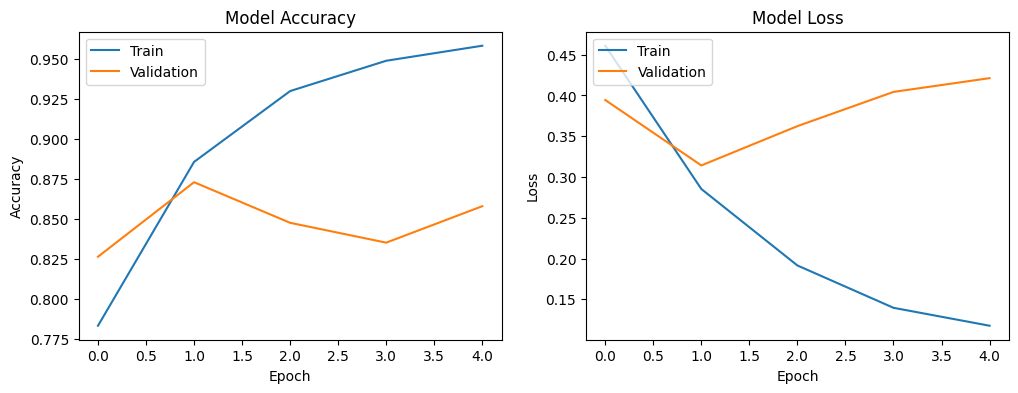

In [6]:
# Visualizing Training Results

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)                                   # Create subplot for accuracy
plt.plot(history.history['accuracy'])                  # Plot training accuracy
plt.plot(history.history['val_accuracy'])              # Plot validation accuracy
plt.title('Model Accuracy')                            # Title of the plot
plt.ylabel('Accuracy')                                 # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

# Plot training & validation loss values
plt.subplot(1, 2, 2)                                   # Create subplot for loss
plt.plot(history.history['loss'])                      # Plot training loss
plt.plot(history.history['val_loss'])                  # Plot validation loss
plt.title('Model Loss')                                # Title of the plot
plt.ylabel('Loss')                                     # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

plt.show()                                             # Display the plots


## Common Challenges and Solutions

**1. Vanishing/Exploding Gradients:**
- **Problem:** Gradients become too small (vanishing) or too large (exploding) during backpropagation, causing training to stall or become unstable.
- **Solutions:**
  - **Appropriate Activation Functions:** Use activation functions like ReLU, which mitigate the vanishing gradient problem by allowing gradients to flow through the network.
  - **Proper Initialization:** Use techniques like He initialization for ReLU activations or Xavier initialization for sigmoid/tanh activations to maintain gradient flow.
  - **Gradient Clipping:** Clip gradients during backpropagation to prevent them from becoming too large.

**2. Overfitting:**
- **Problem:** The model performs well on training data but poorly on unseen test data.
- **Solutions:**
  - **Dropout:** Randomly sets a fraction of the input units to 0 at each update during training to prevent over-reliance on specific neurons.
  - **Regularization:** Adds a penalty to the loss function to limit model complexity. Common techniques include L1 (Lasso) and L2 (Ridge) regularization.
  - **Increase Training Data:** Collect more data or use data augmentation techniques to create variations of existing data, which helps the model generalize better.

**3. Long-Term Dependencies:**
- **Problem:** Standard RNNs struggle to capture long-term dependencies in sequences due to the vanishing gradient problem.
- **Solutions:**
  - **Use LSTM or GRU Layers:** These layers are designed to capture long-term dependencies by using gates to control the flow of information.

**4. Slow Training:**
- **Problem:** Training an RNN can be time-consuming, especially with large datasets and complex models.
- **Solutions:**
  - **Use GPUs:** Leverage the parallel processing power of GPUs to speed up computations.
  - **Efficient Algorithms:** Use optimized algorithms and libraries designed for high-performance deep learning, such as TensorFlow and PyTorch.

**5. Data Imbalance:**
- **Problem:** The training data has an unequal distribution of classes, leading to biased predictions towards the majority class.
- **Solutions:**
  - **Resampling:** Use techniques like oversampling the minority class or undersampling the majority class to balance the dataset.
  - **Class Weights:** Assign higher weights to the minority class in the loss function to give it more importance during training.

**6. Hyperparameter Tuning:**
- **Problem:** Finding the optimal set of hyperparameters (e.g., learning rate, batch size, number of layers) can be challenging and time-consuming.
- **Solutions:**
  - **Grid Search:** Explore a predefined set of hyperparameter values systematically.
  - **Random Search:** Sample hyperparameter values randomly within specified ranges.
  - **Bayesian Optimization:** Use probabilistic models to find the optimal hyperparameters more efficiently.

By addressing these common challenges, you can build more robust and effective recurrent neural network models.


## Resources for Further Learning

- [Deep Learning by Ian Goodfellow](https://www.deeplearningbook.org/)
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/)
- [TensorFlow Documentation](https://www.tensorflow.org/tutorials)
- [Keras Documentation](https://keras.io/)
- [Stanford CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/)
- [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)


## Conclusion

In this notebook, we covered the basics of recurrent neural networks, including what they are, their key components, and how they work. We built a simple RNN model to classify movie reviews from the IMDB dataset, and we discussed common challenges and solutions in RNN training. This notebook serves as an introduction, providing a foundation for further exploration into more advanced topics such as advanced RNN architectures, attention mechanisms, and sequence-to-sequence models.

While this guide covers essential concepts and practical steps, recurrent neural networks are a vast field with continuous advancements and complexities. To truly master RNNs, you'll need to dive deeper into specific areas, experiment with different architectures, and stay updated with the latest research.

With this foundation, you're ready to explore more advanced topics and applications. Keep learning, experimenting, and pushing the boundaries of what you can achieve with recurrent neural networks.

Happy learning!
